In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
# Import dependencies
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
from scipy.stats import qmc
yfin.pdr_override()

In [ ]:
option_type = 'call'
S0 =
strike
T
M
r
div
sigma

[*********************100%***********************]  4 of 4 completed


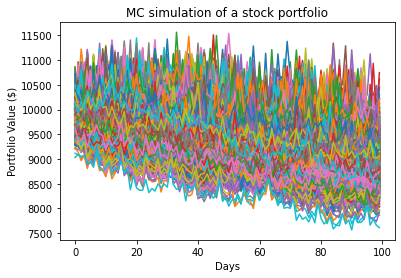

VaR_5 $1526.71
CVaR_5 $1662.73


In [ ]:
# import data
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix
stockList = ['TSLA', 'AAPL', 'MSFT', 'AMZN']
stocks = [stock for stock in stockList]
#stocks = [stock + '.AX' for stock in stockList]
endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=300)
meanReturns, covMatrix = get_data(stocks, startDate, endDate)
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
# Monte Carlo Method
mc_sims = 4000 # number of simulations
T = 100 #timeframe in days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000

def halton_norm(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    x_halton = sampler.random(n)
    return stats.norm.ppf(x_halton)

for m in range(0, mc_sims):
    Z = halton_norm(100, len(weights))
    #Z = np.random.normal(size=(T, len(weights))) #uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

def mcVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: percentile on return distribution to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")
def mcCVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: CVaR or Expected Shortfall to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError("Expected a pandas data series.")
        
        
portResults = pd.Series(portfolio_sims[-1,:])
VaR = initialPortfolio - mcVaR(portResults, alpha=5)
CVaR = initialPortfolio - mcCVaR(portResults, alpha=5)
print('VaR_5 ${}'.format(round(VaR,2)))
print('CVaR_5 ${}'.format(round(CVaR,2)))

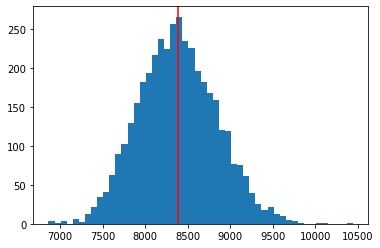

In [ ]:
plt.hist(portfolio_sims[-1,:], bins=50)
plt.axvline(np.mean(portfolio_sims[-1,:]), color="red")

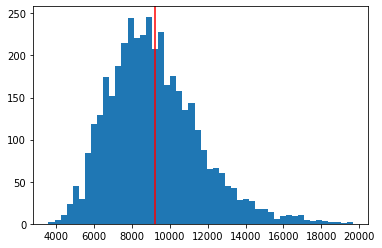

In [ ]:
plt.hist(portfolio_sims[-1,:], bins=50)
plt.axvline(np.mean(portfolio_sims[-1,:]), color="red")

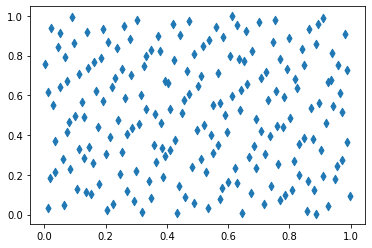

In [ ]:
from scipy.stats import qmc
def halton(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    return sampler.random(n)
def halton_norm(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    x_halton = sampler.random(n)
    return stats.norm.ppf(x_halton)
    
x = halton(n=200, d=2).T
plt.scatter(x[0],x[1], marker='d')

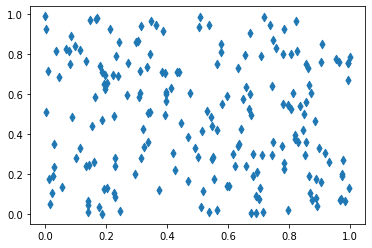

In [ ]:
y = np.random.uniform(size=(200, 2)).T
plt.scatter(y[0],y[1], marker='d')

In [ ]:
x = halton(n=200, d=2).T
print(x)

[[0.78322831 0.15822831 0.65822831 0.40822831 0.90822831 0.09572831
  0.59572831 0.34572831 0.84572831 0.22072831 0.72072831 0.47072831
  0.97072831 0.01760331 0.51760331 0.26760331 0.76760331 0.14260331
  0.64260331 0.39260331 0.89260331 0.08010331 0.58010331 0.33010331
  0.83010331 0.20510331 0.70510331 0.45510331 0.95510331 0.04885331
  0.54885331 0.29885331 0.79885331 0.17385331 0.67385331 0.42385331
  0.92385331 0.11135331 0.61135331 0.36135331 0.86135331 0.23635331
  0.73635331 0.48635331 0.98635331 0.00979081 0.50979081 0.25979081
  0.75979081 0.13479081 0.63479081 0.38479081 0.88479081 0.07229081
  0.57229081 0.32229081 0.82229081 0.19729081 0.69729081 0.44729081
  0.94729081 0.04104081 0.54104081 0.29104081 0.79104081 0.16604081
  0.66604081 0.41604081 0.91604081 0.10354081 0.60354081 0.35354081
  0.85354081 0.22854081 0.72854081 0.47854081 0.97854081 0.02541581
  0.52541581 0.27541581 0.77541581 0.15041581 0.65041581 0.40041581
  0.90041581 0.08791581 0.58791581 0.33791581 0.